Classificação com sklearn

Referência https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/

In [1]:

# Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
train_set.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test_set.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
def acuracia(confusion_matrix):
        soma_diagonal = confusion_matrix.trace()
        soma_todos_elementos = confusion_matrix.sum()
        return soma_diagonal / soma_todos_elementos

In [6]:
sc = StandardScaler()
train_set[['px_height', 'px_width', 'mobile_wt', 'ram', 'int_memory']] = sc.fit_transform(train_set[['px_height', 'px_width', 'mobile_wt', 'ram', 'int_memory']])

In [7]:
#variaveis_continuas = train_set[['px_height', 'px_width', 'mobile_wt']].values / 100
#variaveis_continuas = np.append(variaveis_continuas, train_set [['ram']].values / 200, axis = 1)
#variaveis_continuas = np.append(variaveis_continuas, train_set [['int_memory']].values / 3, axis = 1)
#variaveis_continuas = np.append(variaveis_continuas, train_set [['clock_speed', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time' ]].values , axis = 1)
#variaveis_categoricas = train_set[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].values

#treino_x = np.concatenate ([variaveis_continuas, variaveis_categoricas], axis = 1)
#treino_y = train_set['price_range'].values

In [8]:
train_set.columns.tolist()

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [9]:
#Melhor resultado até o momento
training_set, validation_set = train_test_split(train_set, test_size=0.2, random_state=21)
X_train = training_set.iloc[:,0:-1].values
X_train = np.delete(X_train, np.s_[1:12], axis = 1)
Y_train = training_set.iloc[:,-1].values
X_val = validation_set.iloc[:,0:-1].values
X_val = np.delete(X_val, np.s_[1:12], axis = 1)
y_val = validation_set.iloc[:,-1].values
classificador = MLPClassifier(hidden_layer_sizes=(400,100,10), max_iter=200, activation = 'tanh', solver='adam', random_state=1)

In [10]:
classificador.fit(X_train, Y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(400, 100, 10),
              random_state=1)

In [11]:
y_pred = classificador.predict(X_val)

In [12]:
print(y_pred)

[3 0 0 0 3 0 1 0 2 0 0 1 1 3 3 1 0 1 1 2 0 1 0 1 3 0 1 2 1 3 2 0 2 0 3 2 2
 3 3 3 2 3 0 3 3 0 2 2 1 2 2 1 3 0 0 1 1 3 1 0 0 2 3 1 0 0 2 3 0 3 0 1 2 2
 0 3 1 0 0 1 3 2 3 0 1 3 1 2 0 0 2 0 3 2 3 1 2 3 0 2 0 3 0 2 1 3 2 1 0 3 2
 0 2 0 2 0 3 3 3 2 1 2 1 0 0 1 0 1 2 1 1 2 1 3 2 3 3 0 3 3 0 0 3 1 2 1 0 2
 1 0 3 2 2 2 1 1 3 2 0 3 3 3 2 0 2 0 1 1 1 1 2 1 1 1 1 0 1 3 2 0 0 3 0 1 3
 1 3 0 1 2 0 0 1 0 1 3 0 1 1 0 3 2 1 1 0 1 0 1 1 0 3 3 1 2 0 1 1 3 1 3 2 0
 0 1 0 3 1 2 2 2 3 0 2 2 3 0 3 0 1 1 2 2 2 1 0 2 3 1 2 1 1 2 0 1 0 3 0 0 1
 1 1 0 3 3 0 3 3 3 1 0 2 3 2 2 0 3 3 3 0 0 0 0 3 2 2 0 3 2 2 0 1 3 3 2 3 0
 2 2 3 1 1 1 3 2 0 2 2 1 0 0 0 0 3 0 3 0 2 1 3 0 1 2 1 0 2 0 3 1 2 0 0 0 0
 3 3 2 2 3 3 0 2 2 0 1 2 2 0 3 1 0 1 1 2 2 2 1 1 0 0 3 3 0 3 2 1 1 2 2 3 2
 3 3 1 0 0 1 1 0 0 1 0 2 1 2 2 2 2 0 0 3 2 0 2 1 0 0 0 0 3 2]


In [13]:
y_pred_pred = pd.DataFrame(y_pred)

<AxesSubplot:ylabel='Frequency'>

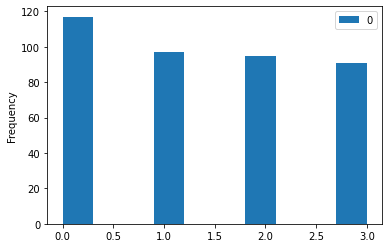

In [14]:
y_pred_pred.plot.hist()

In [15]:
cm = confusion_matrix(y_pred,y_val)

In [16]:
print("Accuracy of MLPClassifier ", acuracia(cm))

Accuracy of MLPClassifier  0.895


In [21]:
print(cm)

[[111   6   0   0]
 [  9  82   6   0]
 [  0   7  79   9]
 [  0   0   5  86]]


In [17]:
test_set[['px_height', 'px_width', 'mobile_wt', 'ram', 'int_memory']] = sc.fit_transform(test_set[['px_height', 'px_width', 'mobile_wt', 'ram', 'int_memory']])
X_test = test_set.iloc[:,0:-1].values
X_test = np.delete(X_test, np.s_[1:12], axis = 1)
y_pred = classificador.predict(X_test)

In [18]:
print(y_pred)

[1 0 3 3 0 0 3 3 0 0 0 3 3 3 2 3 2 0 2 0 3 2 2 0 2 1 0 0 0 0 1 0 3 0 3 2 2
 0 0 0 3 0 0 0 0 1 0 3 2 0 0 0 2 0 2 0 3 3 0 0 0 0 0 0 0 1 2 1 1 2 0 2 0 2
 2 0 0 1 0 1 0 1 1 1 0 2 0 0 0 0 0 1 0 2 0 0 2 0 1 0 0 2 0 3 0 0 3 0 0 0 0
 1 0 0 2 0 0 3 2 2 0 0 0 0 1 2 1 0 2 3 0 2 0 0 2 2 0 2 1 1 0 0 0 2 0 2 2 0
 2 0 0 1 1 0 1 0 2 0 0 0 1 1 1 3 2 0 0 1 3 0 0 0 2 2 1 1 0 2 0 1 2 0 0 2 0
 2 2 2 1 0 1 2 1 2 1 1 2 1 2 0 0 0 2 0 1 2 2 1 1 0 0 2 0 3 0 3 0 1 1 0 1 0
 2 1 1 2 2 0 3 0 1 0 0 2 0 2 0 0 1 0 2 0 2 0 1 1 2 0 2 0 0 1 1 0 1 1 2 1 0
 2 0 1 0 0 1 0 2 0 1 0 1 2 1 0 1 2 2 2 1 0 1 2 0 1 2 1 0 0 0 0 3 0 1 1 2 2
 1 0 0 1 0 0 2 2 1 2 0 1 1 2 2 0 0 1 3 0 2 2 0 0 0 1 0 2 2 1 0 0 0 0 0 2 2
 0 0 0 0 0 0 1 0 0 0 0 1 2 1 1 1 0 2 0 0 1 0 2 0 2 2 3 2 0 2 1 1 1 0 0 0 2
 1 0 2 0 1 1 0 1 1 2 0 0 3 1 2 0 0 2 2 0 0 0 1 0 1 0 1 1 0 0 0 0 2 0 0 0 2
 2 0 1 2 1 1 1 1 2 0 1 0 1 0 0 1 0 1 1 3 0 2 2 1 2 0 2 0 0 0 0 0 0 1 1 1 1
 0 2 1 1 0 0 0 0 0 1 0 0 1 0 2 3 0 2 2 0 2 0 0 3 2 2 0 2 0 1 2 2 2 2 2 1 1
 3 0 0 2 2 0 3 0 2 1 2 2 

In [19]:
y_pred_test = pd.DataFrame(y_pred)

<AxesSubplot:ylabel='Frequency'>

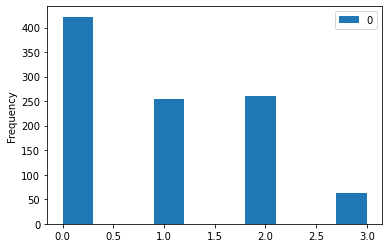

In [20]:
y_pred_test.plot.hist()